In [1]:
###### data loader####
#import clip
from tqdm import tqdm
import numpy as np
from PIL import Image
from math import log, sqrt, pi
import argparse
from torch import nn, optim
from torch.autograd import Variable, grad
from scipy import linalg as la
from transformers import CLIPProcessor, CLIPModel
import math
import torchvision.transforms as tvt
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import torch
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as tfms
from torch.utils.data import DataLoader, Subset, Dataset
from torchvision.utils import make_grid
from torchvision import utils
from PIL import Image
import random
from tqdm import trange
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

torch.set_num_threads(2)   # Sets the number of threads used for intra-operations
torch.set_num_interop_threads(2)   # Sets the number of threads used for inter-operations

import open_clip


device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
batch_size = 1

def get_transform_clip(train):
    transform = tfms.Compose([       
        tfms.Resize((224,224), interpolation=tfms.InterpolationMode.BICUBIC),
        tfms.ToTensor(),
        tfms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    return transform


model,_, preprocess =  open_clip.create_model_and_transforms("ViT-L-14", pretrained='laion2b_s32b_b82k') #ViTB/32
model = model.to(device)
tokenizer = open_clip.get_tokenizer('ViT-L-14')


def seed_everything(seed):
    """
    Changes the seed for reproducibility. 
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

data_dir = r'../../../Dataset/data/UrbanCars/Whac-A-Mole-main/data/urbancars/bg-0.5_co_occur_obj-0.5/test'

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Root directory containing the folders.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        label_map = {"urban": 0, "country": 1}
        
        # Iterate over all folders in root_dir
        for folder_name in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder_name)

            if os.path.isdir(folder_path):
                parts = folder_name.split("_")
                y = parts[0].split("-")[1]  # Extract country after 'obj'
                spu = parts[1].split("-")[1]  # Extract country after 'bg'
                y = label_map.get(y, -1)
                spu = label_map.get(spu, -1)
                print(y, spu)
                
                # Iterate over all image files
                for img_name in os.listdir(folder_path):  
                    if img_name.endswith(('.jpg')):  
                        img_path = os.path.join(folder_path, img_name)
                        self.data.append((img_path, y, spu))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, y, spu = self.data[idx]
        image = Image.open(img_path).convert("RGB")  # Load image
        
        if self.transform:
            image = self.transform(image)  # Apply transformations

        return image, y, spu
        
transform = tfms.Compose([
    tfms.Resize((224, 224)),
    tfms.ToTensor(),
    tfms.Normalize([0.485, 0.456, 0.406],
                      [0.229, 0.224, 0.225])
    ])


test_dataset = CustomImageDataset(root_dir=data_dir, transform=transform)
seed = 1
batch_size = 1
test_data_loader  = torch.utils.data.DataLoader(dataset = test_dataset,
                                                batch_size= batch_size,
                                                shuffle=True,
                                                num_workers=0,
                                                drop_last=False)
print('Done')

0 1
0 1
0 0
1 0
1 1
1 0
0 0
1 1
Done


Testing:   5%|███▋                                                                    | 51/1000 [00:03<01:09, 13.75it/s]

<Figure size 1000x500 with 0 Axes>

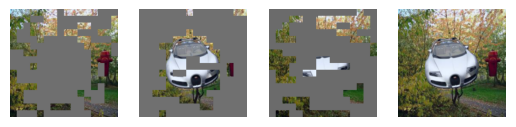

<Figure size 1000x500 with 0 Axes>

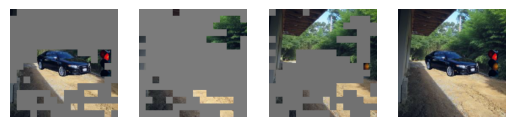

Testing:   5%|███▊                                                                    | 53/1000 [00:04<01:34,  9.98it/s]

<Figure size 1000x500 with 0 Axes>

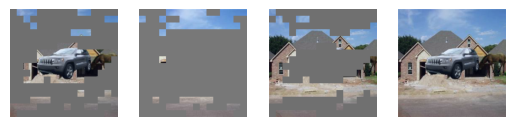

<Figure size 1000x500 with 0 Axes>

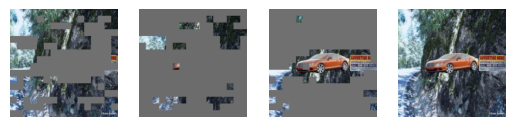

Testing:   6%|███▉                                                                    | 55/1000 [00:04<01:49,  8.59it/s]

<Figure size 1000x500 with 0 Axes>

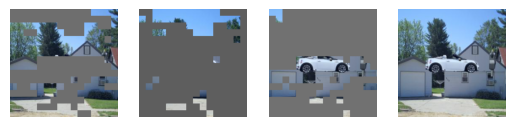

Testing:   6%|████                                                                    | 56/1000 [00:04<01:55,  8.16it/s]

<Figure size 1000x500 with 0 Axes>

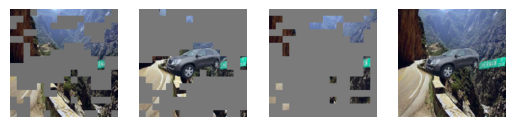

Testing:   6%|████                                                                    | 57/1000 [00:05<02:37,  5.99it/s]

<Figure size 1000x500 with 0 Axes>

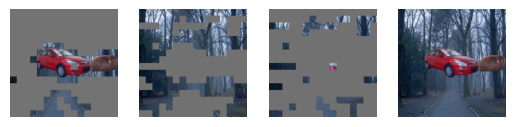

Testing:   6%|████▏                                                                   | 58/1000 [00:05<02:32,  6.17it/s]

<Figure size 1000x500 with 0 Axes>

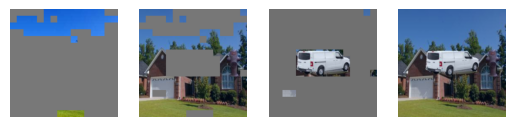

Testing:   6%|████▏                                                                   | 59/1000 [00:05<02:29,  6.30it/s]

<Figure size 1000x500 with 0 Axes>

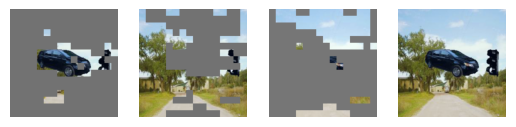

Testing:   6%|████▎                                                                   | 60/1000 [00:05<02:27,  6.38it/s]

<Figure size 1000x500 with 0 Axes>

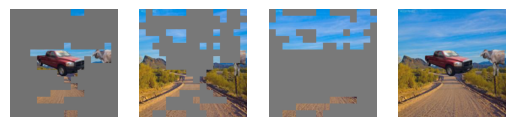

Testing:   6%|████▍                                                                   | 61/1000 [00:05<02:25,  6.44it/s]

<Figure size 1000x500 with 0 Axes>

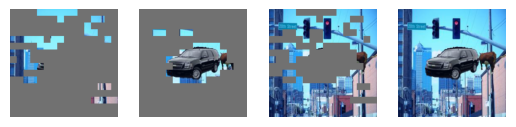

Testing:   6%|████▍                                                                   | 62/1000 [00:05<02:26,  6.41it/s]

<Figure size 1000x500 with 0 Axes>

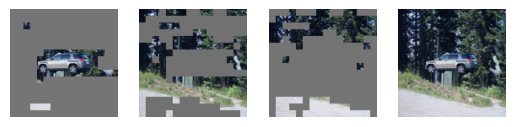

Testing:   6%|████▌                                                                   | 63/1000 [00:05<02:24,  6.48it/s]

<Figure size 1000x500 with 0 Axes>

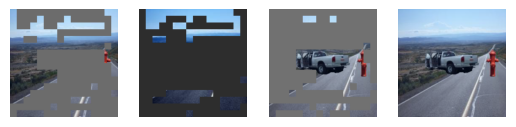

Testing:   6%|████▌                                                                   | 64/1000 [00:06<02:22,  6.59it/s]

<Figure size 1000x500 with 0 Axes>

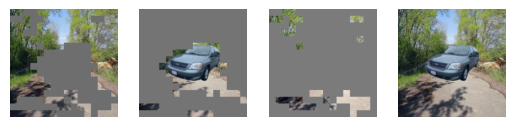

Testing: 100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.39it/s]

Accuracy for label=1, sensitive=0: 0.44000 (total: 250.0)
Accuracy for label=0, sensitive=0: 0.76000 (total: 250.0)
Accuracy for label=1, sensitive=1: 0.71200 (total: 250.0)
Accuracy for label=0, sensitive=1: 0.34000 (total: 250.0)
Overall accuracy: 0.56300 (total: 1000)


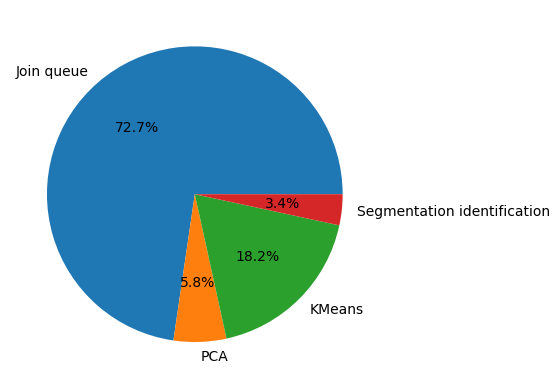

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter
from sklearn.cluster import AgglomerativeClustering
from collections import deque, defaultdict
import time


queue_length = 50
segment_num = 3
pca_feature_num = 3

def pca_single_modality(pca_features, mask, n_imgs, img):  
    to_pil_image = tfms.ToPILImage()
    for i in range(3):
        pca_features[:, i] = (pca_features[:, i] - pca_features[:, i].min()) / (pca_features[:, i].max() - pca_features[:, i].min())
    plt.figure(figsize=(5, 5))
    
    for i in range(n_imgs):
        fig, ax = plt.subplots(1, 3)
        img[i] = (img[i] - img[i].min()) / (img[i].max() - img[i].min())
        image_np = to_pil_image(img[i].cpu().squeeze(0))
        ax[0].imshow(image_np)    
        print(pca_features[i*16*16 :(i+1)*16*16, :].shape)
        image_pca = torch.tensor(pca_features[i*16*16 :(i+1)*16*16, :].reshape(16,16, 3))                    
        ax[1].imshow(image_pca.cpu().numpy())
        ax[2].imshow(mask[i*16*16 :(i+1)*16*16, :].reshape(16,16, 3))
    plt.show()
    plt.close()



def pca_single_modality_queue(pca_features, mask, n_imgs, img, id, imshow = False):  
    to_pil_image = tfms.ToPILImage()
    for i in range(segment_num):
        pca_features[:, i] = (pca_features[:, i] - pca_features[:, i].min()) / (pca_features[:, i].max() - pca_features[:, i].min())

    if id < queue_length:
        image_pca = torch.tensor(pca_features[id*16*16 : (id + 1)*16*16, :].reshape(16,16, pca_feature_num))    
    else:
        image_pca = torch.tensor(pca_features[-16*16 :, :].reshape(16,16, pca_feature_num))

    if id < queue_length:
        mask_tensor = mask[id*16*16 : (id + 1)*16*16, :].reshape(16,16, segment_num)
    else:
        mask_tensor = mask[-16*16 :, :].reshape(16,16, segment_num)
    
    if imshow == True:
        plt.figure(figsize=(5, 5))
        fig, ax = plt.subplots(1, segment_num)
        img = (img - img.min()) / (img.max() - img.min())
        image_np = to_pil_image(img.cpu().squeeze(0))
        ax[0].imshow(image_np)                 
        ax[1].imshow(image_pca.cpu().numpy())
        ax[2].imshow(mask_tensor)
        plt.show()
        plt.close()
    return mask_tensor


def masked_img(image, mask, imshow, prob):  # image: (3, 224, 224), mask: (16, 16, 3)
    to_pil_image = tfms.ToPILImage()
    mask_single_channel = torch.argmax(mask, dim=-1)  # Shape: [16, 16]
    mask_upsampled = F.interpolate(mask_single_channel.unsqueeze(0).unsqueeze(0).float(),
                                    size=(224, 224), mode="nearest").squeeze().long()  # Shape: [224, 224]
    binary_masks = [(mask_upsampled == value).float() for value in range(segment_num)]
    masked_images = [image * binary_mask.unsqueeze(0) for binary_mask in binary_masks]
    normalized_images = []
    show_images = []
    for masked_image in masked_images:
        if masked_image.max() > masked_image.min():
            #normalized_image = (masked_image - masked_image.min()) / (masked_image.max() - masked_image.min())
            normalized_image = masked_image
        else:
            normalized_image = masked_image  # No normalization needed if uniform
        show_image = (masked_image - masked_image.min()) / (masked_image.max() - masked_image.min())
        normalized_images.append(normalized_image)
        show_images.append(show_image)
    if imshow == True:
        plt.figure(figsize=(10, 5))
        fig, ax = plt.subplots(1, segment_num+1)
        for i in range(segment_num):
            image_np = to_pil_image(show_images[i].squeeze(0).cpu())
            ax[i].imshow(image_np)
            ax[i].axis('off')
        img = (image - image.min()) / (image.max() - image.min())
        image_np_o = to_pil_image(img.cpu().squeeze(0))
        ax[segment_num].imshow(image_np_o) 
        ax[segment_num].axis('off')
        plt.show()
    return normalized_images
    

def my_convert_ids_to_tokens(tokenizer, token_ids):
    if isinstance(token_ids, torch.Tensor):
        token_ids = token_ids.tolist()
    tokens = []
    for tid in token_ids:
        if tid in tokenizer.decoder:
            tokens.append(tokenizer.decoder[tid])
        else:
            tokens.append(f"[UNK_{tid}]")
    return tokens


def fast_PCA(X):
    X = X.to(device)
    U, S, Vt = torch.svd_lowrank(X, q=16)
    k = pca_feature_num 
    PCs = Vt[:, :k]  # Shape: (768, 3)
    X_pca = X @ PCs  # Shape: (4096, 3)
    return X_pca


def test_epoch(vlm,   dataloader):  
    vlm = vlm.to(device)
    vlm.eval()   
    visual = vlm.visual
    img_show = queue_length + 15
    vlm.visual.pool_type = None
    T =1
    texts_label = ["a photo of an urban car", "a photo of a country car"] 
    general_label = ["a photo of a car."]
    text_label_tokened = tokenizer(texts_label).to(device)
    general_label_tokened = tokenizer(general_label).to(device)
    text_embeddings = vlm.encode_text(text_label_tokened)#[:,:length,:]
    vlm.text_pool_type = 'last'
    general_embeddings = vlm.encode_text(general_label_tokened)
    iteration = 0
    queue = deque()
    pca = PCA(n_components=3)
    overall_correct = 0
    overall_total = 0
    correct = defaultdict(float)
    total = defaultdict(float)

    
    
    for _, (sample, _, _) in enumerate(tqdm(dataloader, desc="Testing")):
        sample = sample.to(device)
        img_embeds = vlm.encode_image(sample)[:,1:,:].squeeze(0)  #torch.Size([1, 257, 768])
        img_embeds = img_embeds.detach().cpu().numpy()   
        queue.append(img_embeds)
        iteration += 1
        if iteration> queue_length:
            break

    iteration = 0
    time_1 = 0
    time_2 = 0
    time_3 = 0
    time_4 = 0
    for step, (test_input, test_target, sensitive_real) in enumerate(tqdm(dataloader, desc="Testing")):
        with torch.no_grad(): 
            start_step1 = time.time()
            gt = test_target.detach().cpu().numpy()
            sen = sensitive_real.detach().cpu().numpy()      
            test_input = test_input.to(device)
            img_embeddings = vlm.encode_image(test_input)  #torch.Size([1, 257, 768])
            comb_feature_gpu = img_embeddings[:,1:,:].squeeze(0)
            comb_feature = comb_feature_gpu.detach().cpu().numpy() 
            
            if step < queue_length:
                combined_array = torch.vstack([torch.from_numpy(arr) if isinstance(arr, np.ndarray) else arr for arr in queue]).to(device)

                
            else:            
                queue.popleft()
                queue.append(comb_feature)
                combined_array = torch.vstack([torch.from_numpy(arr) if isinstance(arr, np.ndarray) else arr for arr in queue]).to(device)


            end_step1 = time.time()
            lapse = end_step1 - start_step1
            time_1+= lapse
            start_step2 = time.time()
            pca_features = fast_PCA(combined_array).cpu().numpy()
            end_step2 = time.time()
            lapse_2 = end_step2 - start_step2
            time_2+= lapse_2
            
            start_step3 = time.time()
            smoothed_data = gaussian_filter(pca_features, sigma=(0.75, 0)) #0.84
            kmean_cluster = KMeans(n_clusters=segment_num, random_state=10, n_init="auto").fit_predict(smoothed_data)

            encoder = OneHotEncoder(sparse_output=False)
            one_hot_mask = encoder.fit_transform(kmean_cluster.reshape(-1, 1))
            pca_features_rgb = pca_features.copy()

            end_step3 = time.time()
            lapse_3 = end_step3 - start_step3
            time_3+= lapse_3
            start_step4 = time.time()
            mask = pca_single_modality_queue(pca_features_rgb, one_hot_mask, batch_size, test_input, step)
            msks = masked_img(test_input.cpu(), torch.tensor(mask).cpu(), False, None)
            mask_single_channel = torch.argmax(torch.tensor(mask).cpu(), dim=-1).view(16, 16).contiguous().view(-1)
            local_rep = [comb_feature_gpu[mask_single_channel == i] for i in range(segment_num)]
            
            seg_embedding = torch.vstack([
                torch.mean(local_rep[i], dim=0, keepdim=True) for i in range(segment_num)
            ])
            nan_mask = torch.isnan(seg_embedding).any(dim=1)  
            seg_embedding = torch.nan_to_num(seg_embedding, nan=10)
            general_embeddings = general_embeddings / general_embeddings.norm(dim=1, keepdim=True)      
            seg_cosine_similarity = torch.mm(-seg_embedding, general_embeddings.t())
            probs = seg_cosine_similarity.softmax(dim = 0)
            conf, predic = torch.max(probs.data, 0)

            end_step4 = time.time()
            lapse_4 = end_step4 - start_step4
            time_4+= lapse_4

            if step < img_show and step > queue_length:
                masked_img(test_input.cpu(), torch.tensor(mask).cpu(), True, probs)
            
            high_attention_seg = msks[predic]
            high_embedding = vlm.encode_image(high_attention_seg.to(device))[:,0,:] 
            high_embedding = high_embedding.squeeze(1)
            high_embedding = high_embedding/high_embedding.norm(dim=1, keepdim=True)
            text_embeddings = text_embeddings/text_embeddings.norm(dim=1, keepdim=True)

            cosine_similarity = torch.mm(high_embedding, text_embeddings.t())
            logits_per_image = cosine_similarity 
            probs = logits_per_image.softmax(dim=1)
            _, predic = torch.max(probs.data, 1)
            predic = predic.detach().cpu()

            label = test_target.detach().cpu()
            overall_correct += (predic == label).sum()
            overall_total += len(test_target.reshape(-1).detach().cpu())
            
            unique_groups = np.unique(np.stack([label, sensitive_real], axis=1), axis=0)
            for group in unique_groups:
                mask = (label == group[0]) & (sensitive_real == group[1])
                correct[tuple(group)] += (predic[mask] == label[mask]).sum()
                total[tuple(group)] += mask.sum()

    for group, correct_count in correct.items():
        accuracy = correct_count / total[group]
        print(f'Accuracy for label={group[0]}, sensitive={group[1]}: {accuracy:.5f} (total: {total[group]})')

    overall_accuracy = overall_correct / overall_total
    print(f'Overall accuracy: {overall_accuracy:.5f} (total: {overall_total})')


    labels = ['Join queue', 'PCA', 'KMeans', 'Segmentation identification']
    durations = [time_1, time_2, time_3,time_4]
    plt.pie(durations, labels=labels, autopct='%1.1f%%')
    plt.show()
    
            


seed_everything(20)  
model = model.to(device)
model = model.eval()
test_epoch(model, test_data_loader)